#Standard Settings
**$B_0$ = 1 $\mu T$**

**Chamber Height = 12 $cm$**

**Chamber Radius = 23.5 $cm$**

#$E_0$ = 1 $\frac{MV}{m}$

In [1]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams['xtick.labelsize'] = 20

In [2]:
dist_range = np.concatenate([[.001], np.arange(.01, .11, .01)])
dip_str_range=srkmisc.even_sample_over_log(1e-18, 1e-13, 6)
rid_list = range(443, 509)
lines = [rid_list[x:x+len(dist_range)] for x in xrange(0, len(rid_list), len(dist_range))]
lines = zip(*lines)
legend_titles=[str(x*1000)+' mm from bottom' for x in dist_range[0:len(lines)]]

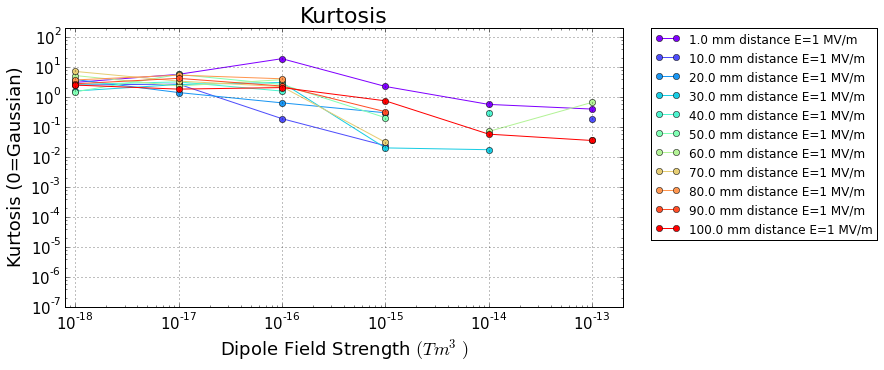

In [5]:
x,y=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "Par_PhiKurtosis")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    plt.loglog(a,b,marker='o',label = legend_titles[i],c=next(color))
plt.tick_params(labelsize=15)
plt.xlabel(r'Dipole Field Strength $(T m^3)$', fontsize=18)
plt.ylabel('Kurtosis (0=Gaussian)', fontsize=18)
plt.title('Kurtosis', fontsize=22)
plt.grid(True)
plt.axis([ 8e-19, 2e-13,1e-7, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

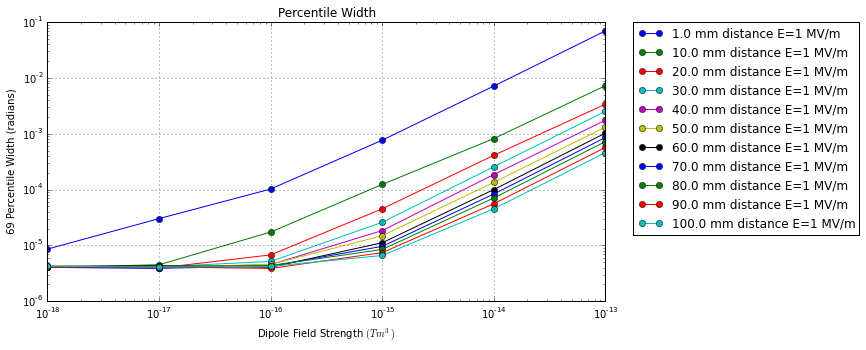

In [4]:
x,y=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "Par_PhiPercentileWidth")
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    plt.loglog(a,b,marker='o',label = legend_titles[i])
plt.tick_params(labelsize=15)
plt.xlabel(r'Dipole Field Strength $(T m^3)$')
plt.ylabel('69 Percentile Width (radians)')
plt.title('Percentile Width')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

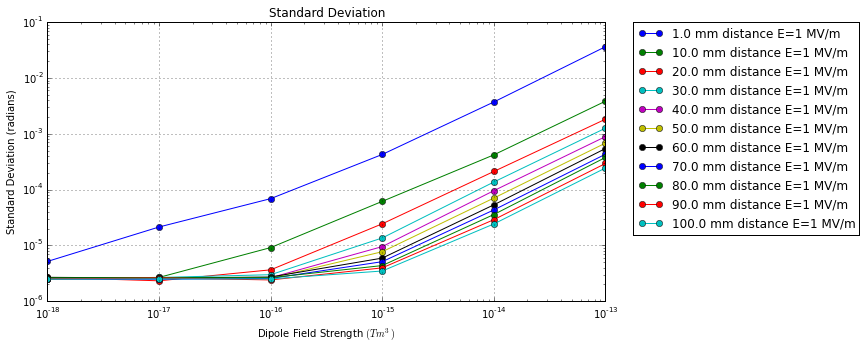

In [5]:
x,y=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "Par_PhiStDev")
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    plt.loglog(a,b,marker='o',label = legend_titles[i])
plt.xlabel(r'Dipole Field Strength $(T m^3)$')
plt.ylabel('Standard Deviation (radians)')
plt.title('Standard Deviation')
plt.tick_params(labelsize=15)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

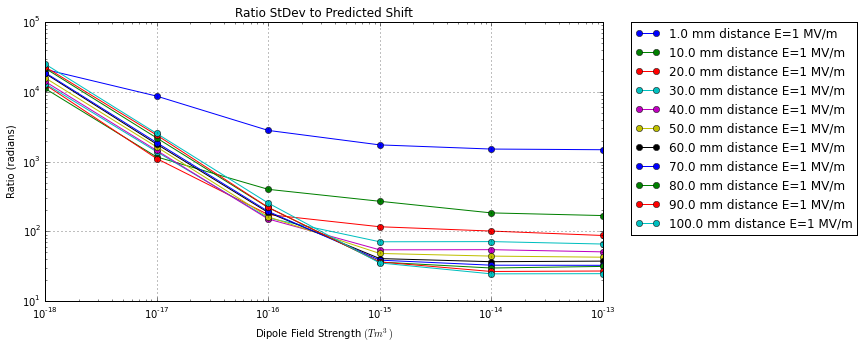

In [6]:
x,y=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "PRPrediction")
z,w=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "Par_PhiStDev")
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    c,d=zip(*sorted(zip(z[i],w[i]), key=lambda x: x[0]))
    b=list(b)
    for j in range(len(b)):
        b[j] = d[j]/(abs(b[j] / (100. * 6.582E-016 / (4. * 1e6)))*100.)
    plt.loglog(a,b,marker='o',label = legend_titles[i])
plt.xlabel(r'Dipole Field Strength $(T m^3)$')
plt.ylabel('Ratio (radians)')
plt.title('Ratio StDev to Predicted Shift')
plt.tick_params(labelsize=15)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

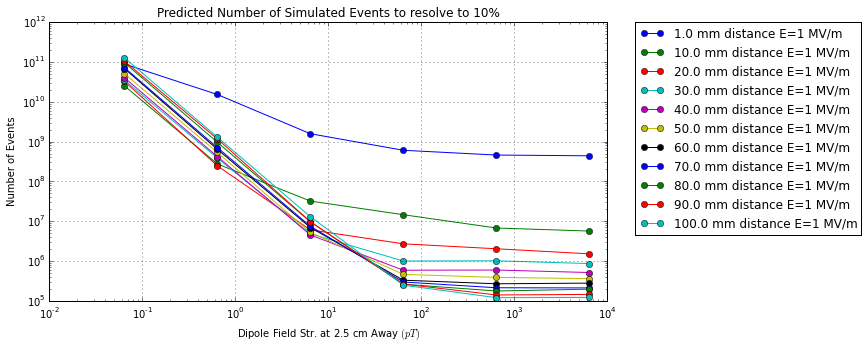

In [7]:
x,y=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "PRPrediction")
z,w=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "Par_PhiStDev")
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    c,d=zip(*sorted(zip(z[i],w[i]), key=lambda x: x[0]))
    b=list(b)
    a=list(a)
    for j in range(len(b)):
        a[j] = (a[j]/pow(0.025,3))*1.e12
        b[j] = pow(d[j]*math.sqrt(2)*10./(abs(b[j] / (100. * 6.582E-016 / (4. * 1e6)))*100.),2)
    plt.loglog(a,b,marker='o',label = legend_titles[i])
plt.xlabel(r'Dipole Field Str. at 2.5 cm Away $(pT)$')
plt.ylabel('Number of Events')
plt.title('Predicted Number of Simulated Events to resolve to 10%')
plt.tick_params(labelsize=15)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

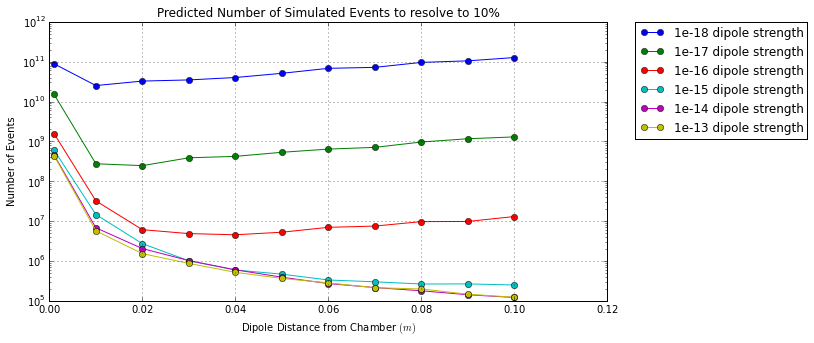

In [14]:
lines2 = [rid_list[x:x+len(dist_range)] for x in xrange(0, len(rid_list), len(dist_range))]
legend_titles2=[str(t)+' dipole strength' for t in srkmisc.even_sample_over_log(1e-18, 1e-13, 6)]

x,y=srkdata.get_plot_data_from_database(lines2, "DipolePosition", "PRPrediction")
z,w=srkdata.get_plot_data_from_database(lines2, "DipolePosition", "Par_PhiStDev")

x=list(x)
for i in range(len(x)):
    x[i]=list(x[i])
    for j in range(len(x[i])):
        x[i][j] = -float(x[i][j].split(' ')[2]) - 0.06
e,f=[],[]
for i in range(len(lines2)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    c,d=zip(*sorted(zip(z[i],w[i]), key=lambda x: x[0]))
    #a,b=x,y
    #c,d=z,w
    b=list(b)
    a=list(a)
    for j in range(len(b)):
        a[j] = a[j]
        b[j] = pow(d[j]*math.sqrt(2)*10./(abs(b[j] / (100. * 6.582E-016 / (4. * 1e6)))*100.),2)
    e.append(a)
    f.append(b)
    plt.semilogy(a,b,marker='o',label = legend_titles2[i])
    
    

# coefficients = np.polyfit(e[0],f[0],6)
# print coefficients
# polynomial=np.poly1d(coefficients)
# xs = dist_range
# ys = polynomial(xs)
# plt.semilogy(xs,ys, label = "Fit")
    
    
plt.xlabel(r'Dipole Distance from Chamber $(m)$')
plt.ylabel('Number of Events')
plt.title('Predicted Number of Simulated Events to resolve to 10%')
plt.grid(True)
plt.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [9]:
coefficients

NameError: name 'coefficients' is not defined